# Weight of evidence

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default).

It is computed from the basic odds ratio: ln( (Proportion of Good Credit Outcomes) / (Proportion of Bad Credit Outcomes))

WoE will be 0 if the P(Goods) / P(Bads) = 1. That is, if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

1. It establishes a monotonic relationship to the dependent variable.
2. It orders the categories on a "logistic" scale which is natural for logistic regression
3. The transformed variables, can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has three drawbacks:

1. May incur in loss of information (variation) due to binning to few categories (we will discuss this further in the discretisation section)
2. It does not take into account correlation between independent variables
3. Prone to cause over-fitting

# IV Values

IV= Sum of ((event%- non_event%) * WOE)

where woe= ln( (event%) / (non_event%))


Weight of evidence (WOE) and Information value (IV) are simple, yet powerful techniques to perform variable transformation and selection. These concepts have huge connection with the logistic regression modeling technique. It is widely used in credit scoring to measure the separation of good vs bad customers.

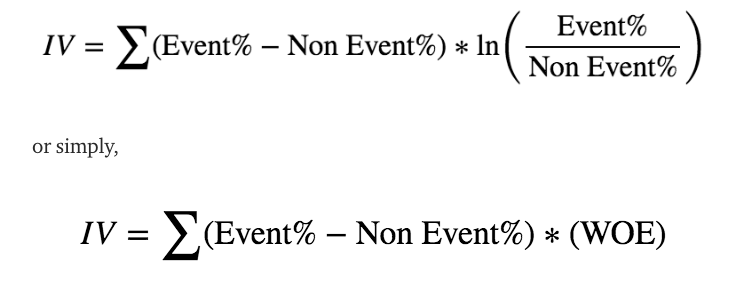

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('tit_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.Cabin.fillna('Missing', inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [4]:
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [131]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
car= data.columns[data.dtypes=='object']

## Important
The calculation of the WoE to replace the labels should be done considering the ONLY the training set, and then expanded it to the test set. See below.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)

In [7]:
X_train.shape,y_train.shape

((623, 12), (623,))

In [85]:
def woe(col):
    prob_df = pd.DataFrame()
    prob_df['Survived']= X_train.groupby([col])['Survived'].mean()
    prob_df['Died'] = 1-prob_df.Survived
    prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
    prob_df.loc[prob_df.Died == 0, 'Survived'] = 0.00001
    prob_df['WOE'] = np.log(prob_df.Survived/prob_df.Died)
    
    return prob_df


In [86]:
woe('Cabin')

,Survived,Died,WOE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [12]:
car

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
woe('Sex')

,Survived,Died,WOE,S-D,IV
Sex,,,,,
female,0.753488,0.246512,1.117304,0.566447,1.424106
male,0.196078,0.803922,-1.410987,0.857659,1.424106


In [124]:
def woe(col):
    prob_df = pd.DataFrame()
    prob_df['count']= X_train.groupby([col])['Survived'].count()
    prob_df['event']= X_train.groupby([col])['Survived'].sum() 
    prob_df['non_event']= prob_df['count'] - prob_df['event']
    prob_df.loc[prob_df['event'] == 0, 'event'] = 0.00001
    prob_df.loc[prob_df['non_event'] == 0, 'non_event'] = 0.00001
    prob_df['event_rate']= prob_df['event']/prob_df['count']
    prob_df['non_event_rate']= prob_df['non_event']/prob_df['count']
    prob_df["dist_event"] = (prob_df['event']/prob_df.sum().event)
    #dist_event= no of event for group/ total sum of event of all group
    prob_df["dist_non_event"] = (prob_df['non_event']/prob_df.sum().non_event)
    #dist_non_event= no of non_event for group/ total sum of non_event of all group
    prob_df['WOE'] = np.log(prob_df['dist_event']/prob_df['dist_non_event'])
    prob_df['IV']= sum((prob_df['dist_event'] - prob_df['dist_non_event'])*prob_df['WOE'])
    prob_df['column']=col
    return prob_df

In [126]:
woe('Cabin')

,count,event,non_event,event_rate,non_event_rate,dist_event,dist_non_event,WOE,IV,column
Cabin,,,,,,,,,,
A,14,6.00000,8.0,0.428571,0.571429,2.479339e-02,0.020997,0.166180,0.490246,Cabin
B,31,24.00000,7.0,0.774194,0.225806,9.917355e-02,0.018373,1.686005,0.490246,Cabin
C,42,24.00000,18.0,0.571429,0.428571,9.917355e-02,0.047244,0.741544,0.490246,Cabin
D,26,18.00000,8.0,0.692308,0.307692,7.438016e-02,0.020997,1.264792,0.490246,Cabin
E,27,20.00000,7.0,0.740741,0.259259,8.264462e-02,0.018373,1.503684,0.490246,Cabin
F,9,6.00000,3.0,0.666667,0.333333,2.479339e-02,0.007874,1.147009,0.490246,Cabin
G,2,1.00000,1.0,0.500000,0.500000,4.132231e-03,0.002625,0.453862,0.490246,Cabin
M,471,143.00000,328.0,0.303609,0.696391,5.909091e-01,0.860892,-0.376307,0.490246,Cabin
T,1,0.00001,1.0,0.000010,1.000000,4.132231e-08,0.002625,-11.059064,0.490246,Cabin


In [127]:
woe('Sex')

,count,event,non_event,event_rate,non_event_rate,dist_event,dist_non_event,WOE,IV,column
Sex,,,,,,,,,,
female,215,162.0,53.0,0.753488,0.246512,0.669421,0.139108,1.571166,1.340788,Sex
male,408,80.0,328.0,0.196078,0.803922,0.330579,0.860892,-0.957125,1.340788,Sex


In [128]:
woe('Embarked')

,count,event,non_event,event_rate,non_event_rate,dist_event,dist_non_event,WOE,IV,column
Embarked,,,,,,,,,,
C,108,61.0,47.0,0.564815,0.435185,0.254167,0.123360,0.722887,0.122809,Embarked
Q,56,23.0,33.0,0.410714,0.589286,0.095833,0.086614,0.101147,0.122809,Embarked
S,457,156.0,301.0,0.341357,0.658643,0.650000,0.790026,-0.195094,0.122809,Embarked


In [134]:
cat= ['Sex','Cabin','Embarked','Pclass','Parch','SibSp']
df= pd.DataFrame()
for i in cat:
    a= woe(i)
    df= pd.concat([df,a],axis=0)

In [135]:
df

,count,event,non_event,event_rate,non_event_rate,dist_event,dist_non_event,WOE,IV,column
female,215,162.00000,53.0,0.753488,0.246512,6.694215e-01,0.139108,1.571166,1.340788,Sex
male,408,80.00000,328.0,0.196078,0.803922,3.305785e-01,0.860892,-0.957125,1.340788,Sex
A,14,6.00000,8.0,0.428571,0.571429,2.479339e-02,0.020997,0.166180,0.490246,Cabin
B,31,24.00000,7.0,0.774194,0.225806,9.917355e-02,0.018373,1.686005,0.490246,Cabin
C,42,24.00000,18.0,0.571429,0.428571,9.917355e-02,0.047244,0.741544,0.490246,Cabin
D,26,18.00000,8.0,0.692308,0.307692,7.438016e-02,0.020997,1.264792,0.490246,Cabin
E,27,20.00000,7.0,0.740741,0.259259,8.264462e-02,0.018373,1.503684,0.490246,Cabin
F,9,6.00000,3.0,0.666667,0.333333,2.479339e-02,0.007874,1.147009,0.490246,Cabin
G,2,1.00000,1.0,0.500000,0.500000,4.132231e-03,0.002625,0.453862,0.490246,Cabin
M,471,143.00000,328.0,0.303609,0.696391,5.909091e-01,0.860892,-0.376307,0.490246,Cabin
